# Representation of configuration, velocity, and forces  
Note that:
- We will use implicit representations of configurations, considering that the C-space is a manifold embedded in a higher-dimensional space. In other words, our representation of a configuration will not use minimum set of coordinates and the velocity will not be represented by a vector in the tangent space.
- Rigid bodies configurations are represented using frames. A frame consist of an origin and a set of three orthogonal x, y, and z axes. All frames are right-handed, which means that the cross product of the x and y axes is the z axis. It can be created using your right hand, where the thumb points in the direction of the z axis, the index finger in the direction of the x axis, and the middle finger in the direction of the y axis.

<div style="text-align:center"> <img src="images\Cartesian-axes-right-hand-rule.svg" width="400"/> <br/> source <a href="https://commons.wikimedia.org/wiki/File%253ACartesian-axes-right-hand-rule.svg">Wikimedia</a> </div>

- If we want to represent the position and orientation of a rigid body, we can use a frame attached to the body and attach another frame to the world. The configuration of the body is given by the position of the origin of the body frame with respect to the origin of the world frame and the orientation of the body frame with respect to the world frame. 

- Positive rotations about an axis is defined by the right-hand rule. If you point your right thumb in the direction of the axis, the curl of your fingers will indicate the direction of the positive rotation.

<div style="text-align:center"> <img src="images\Right-hand_grip_rule.svg" width="400"/> <br/> source <a href="https://commons.wikimedia.org/wiki/File%253ARight-hand_grip_rule.svg">Wikimedia</a> </div>



## Rotation Matrices

### Orientation of a Rigid Body

When studying the orientation of a rigid body, we compare two frames, the "space frame" ({s}) and the "body frame" ({b}). We're mainly interested in how the body frame is rotated compared to the space frame.

### Rotation Matrix

To represent the orientation of the body frame relative to the space frame, we use a special table called a "rotation matrix." This matrix contains 9 numbers that describe how the body frame's x, y, and z-coordinate axes are aligned in the space frame.

Here how it looks like:

$$
R_{sb} =
\begin{bmatrix} 
    \hat{x}_b \ \hat{y}_b \ \hat{z}_b
\end{bmatrix} =
\begin{bmatrix}
    \hat{x}_s \cdot \hat{x}_b & \hat{y}_s \cdot \hat{x}_b & \hat{z}_s \cdot \hat{x}_b \\
    \hat{x}_s \cdot \hat{y}_b & \hat{y}_s \cdot \hat{y}_b & \hat{z}_s \cdot \hat{y}_b \\
    \hat{x}_s \cdot \hat{z}_b & \hat{y}_s \cdot \hat{z}_b & \hat{z}_s \cdot \hat{z}_b
\end{bmatrix} 
$$

$R_{sb}$ indicates the rotation matrix from the body frame to the space frame. Sometimes the two subscripts are implicit, and we just write $R$.



### Constraints

The 9 numbers in the rotation matrix must follow specific rules or "constraints" to make sense. Since we know that the space of orientation is three-dimensional, we expect that there are 6 constraints.
These constraints are:

    - The three column vectors in the matrix (representing the x, y, and z-axes of the body frame) must be "unit vectors," with a length of 1.
    - The dot product of any two of the column vectors must be zero, meaning the three vectors are perpendicular (orthogonal) to each other.

These 6 constrains can be written compactly as:

$$
R^T R = I, I =
\begin{bmatrix}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1
\end{bmatrix}
$$

where $I$ is the identity matrix.

These constrains ensure that determinant of $R$ is either 1, corresponding to a "right-handed" rotation, or -1, corresponding to a "left-handed" rotation. We're only interested in right-handed rotations in this notebook, so we'll only consider rotation matrices with a determinant of 1.

### Special Orthogonal Group (SO(3))

All the valid rotation matrices satisfying the constraints form a special group known as the "special orthogonal group" or SO(3). It includes all possible ways to rotate the body frame with respect to the space frame while maintaining the constraints.

$$
SO(3) = \{ R \in \mathbb{R}^{3 \times 3} \mid R^T R = I, \det(R) = 1 \}
$$

### Properties of Rotation Matrices

Rotation matrices have interesting properties:

- The inverse of a rotation matrix is its transpose, which means to undo a rotation, we use the transpose of the original matrix.
Inverse: $R^{-1} = R^T \in  SO(3)$
- Combining two rotation matrices (matrix multiplication) gives another rotation matrix, enabling us to represent complex rotations using simpler ones.  
Closure: $R_1, R_2 \in SO(3) \Rightarrow R_1 R_2 \in SO(3)$
- The order of multiplication matters; rotation matrices, in general, do not commute (A * B is not always the same as B * A).  
Associativity: $R_1, R_2, R_3 \in SO(3) \Rightarrow R_1 (R_2 R_3) = (R_1 R_2) R_3$
Not Commutative: $R_1, R_2 \in SO(3) \Rightarrow R_1 R_2 \neq R_2 R_1$
- When we use a rotation matrix to rotate a vector (a point in space), the vector's length remains unchanged. Only its direction changes, not its distance from the origin.  
$ x \in \mathbb{R}^3, R \in SO(3) \Rightarrow \| R x \| = \| x \|$

### Uses of Rotation Matrices
The rotation matrix is a very useful tool for representing and manipulating orientations of rigid bodies in 3D space. Here are some of its uses:

    - Representing an orientation.
    - Changing the frame of reference of a vector or frame.
    - Rotating a vector or frame.

### Representation of Orientation

We start by considering coordinate frames {s}, {b}, and {c}, representing the same space but with different orientations.

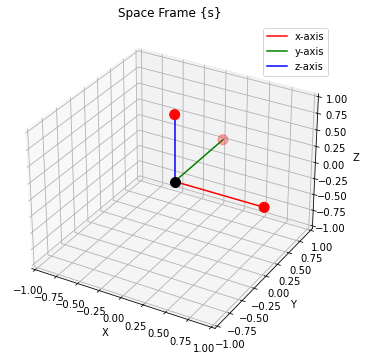

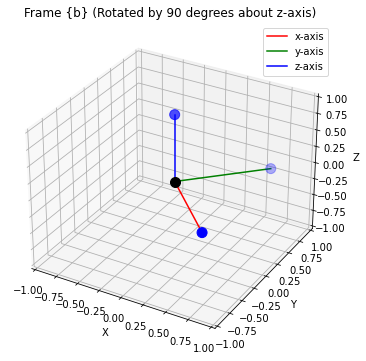

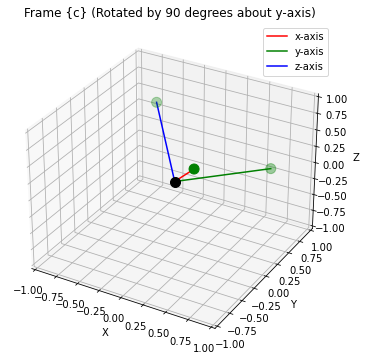

In [9]:
# Visualize Coordinates frames {s}, {b}, {c}
# {s} is the space frame
# {b} is the space frame rotated by 90 degrees about the z-axis
# {c} is the b frame rotated by 90 degrees about the y-axis
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 6

# Define the rotation matrices
def R_x(theta):
    R = np.array([[1, 0, 0],
                  [0, np.cos(theta), -np.sin(theta)],
                  [0, np.sin(theta), np.cos(theta)]])
    return R

def R_y(theta):
    R = np.array([[np.cos(theta), 0, np.sin(theta)],
                  [0, 1, 0],
                  [-np.sin(theta), 0, np.cos(theta)]])
    return R

def R_z(theta):
    R = np.array([[np.cos(theta), -np.sin(theta), 0],
                  [np.sin(theta), np.cos(theta), 0],
                  [0, 0, 1]])
    return R

# Define the rotation angles
theta_x = np.pi / 4
theta_y = np.pi / 4
theta_z = np.pi / 4

# Define the rotation matrices
R_x = R_x(theta_x)
R_y = R_y(theta_y)
R_z = R_z(theta_z)

# Define the space frame
s = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1]])

# Define the b coordinate frame
b = np.dot(R_z, s)
# Define the c coordinate frame
c = np.dot(R_y, b)

# Define the points
p = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1]])

# Function to plot the coordinate frame
def plot_frame(frame, color, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the origin
    ax.scatter(0, 0, 0, color='k', marker='o', s=100)

    # Plot the end points of the axes
    p_frame = np.dot(frame, p.T)
    ax.scatter(p_frame[:, 0], p_frame[:, 1], p_frame[:, 2], color=color, marker='o', s=100)
    

    # Plot the coordinate axes
    # x red, y green, z blue
    ax.plot([0, frame[0, 0]], [0, frame[0, 1]], [0, frame[0, 2]], color='r', label='x-axis')
    ax.plot([0, frame[1, 0]], [0, frame[1, 1]], [0, frame[1, 2]], color='g', label='y-axis')
    ax.plot([0, frame[2, 0]], [0, frame[2, 1]], [0, frame[2, 2]], color='b', label='z-axis')

    # Set the axes properties
    ax.set_xlim3d(-1, 1)
    ax.set_ylim3d(-1, 1)
    ax.set_zlim3d(-1, 1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    ax.legend()

# Plot the frames
plot_frame(s, 'r', 'Space Frame {s}')
plot_frame(b, 'b', 'Frame {b} (Rotated by 90 degrees about z-axis)')
plot_frame(c, 'g', 'Frame {c} (Rotated by 90 degrees about y-axis)')

plt.show()


Initially, the frame is aligned with {s}, and after successive rotations, we obtain the frames {b} and {c}.

#### Rotation Matrices for Frame Orientation

To represent {c} relative to {s}, we use the coordinate axes of {c} in {s} coordinates, yielding the rotation matrix R_sc.

$$
R_{sc} = 
\begin{bmatrix}
    0 & -1 & 0 \\
    0 & 0 & -1 \\
    1 & 0 & 0
\end{bmatrix}
$$

The rotation matrix R_cs, representing the orientation of frame {s} in {c} coordinates, is the transpose (or inverse) of R_sc.

$$
R_{cs} = R_{sc}^{T} = R_{sc}^{-1} = 
\begin{bmatrix}
    0 & 0 & 1 \\
    -1 & 0 & 0 \\
    0 & -1 & 0
\end{bmatrix}


### Changing the Frame of Reference of a Vector or Frame

To demonstrate changing the reference frame, consider the rotation matrix R_bc, representing the orientation of frame {c} in frame {b} coordinates.

$$
R_{bc} =
\begin{bmatrix}
    0 & 0 & -1 \\
    0 & 1 & 0 \\
    1 & 0 & 0
\end{bmatrix}
$$

We can express the {c} frame in {s} coordinates instead of {b} coordinates by performing the matrix multiplication R_sc = R_sb * R_bc.

$$
R_{sc} = R_{s\cancel b} R_{\cancel bc} = 
\begin{bmatrix}
    0 & -1 & 0 \\
    0 & 0 & -1 \\
    1 & 0 & 0
\end{bmatrix}
$$

Remember the subscript cancellation rule: If the second subscript of the first matrix matches the first subscript of the second matrix, they cancel each other, leaving the two remaining subscripts in the right order.

We can also change the reference frame of a vector by multiplying it by a rotation matrix. For example, if we have a vector v expressed in {b} coordinates, we can express it in {s} coordinates by multiplying it by R_sb.
$$
v_b = 
\begin{bmatrix}
    -1 \\
    0 \\
    0
\end{bmatrix}
$$
$$
v_s = R_{s \cancel b} v_{\cancel b} =
\begin{bmatrix}
    0  \\
    -1 \\
    0
\end{bmatrix}
$$


### Rotating a Frame or Vector

A rotation matrix can also be used to rotate a vector or frame.
#### Rotating a Frame

Consider two coordinate frames, {s} (space frame) and {b} (frame obtained from {s} by rotating about the z-axis by 90 degrees). We can represent the {b} frame relative to the {s} frame using the rotation matrix R_sb, which describes the orientation change from {s} to {b}. When we rotate the {s} frame about its z-axis by 90 degrees, we get the {b} frame. So, R_sb is an operation that rotates vectors by 90 degrees about the z-axis.

$$
R_{sb} = R = Rot(\hat{z}, 90\degree)
$$

#### Rotating a Vector

If we have a vector p_b expressed in the {b} frame, we can convert it to the {s} frame by premultiplying it with the rotation matrix R_sb. This process is essentially a change of reference frame from {b} to {s} coordinates. However, if we have a vector p_s expressed in the {s} frame and we premultiply it with R_sb, there is no subscript cancellation. Instead, we get a new vector p-prime-s, obtained by rotating p_s by 90 degrees about the z-axis of the {s} frame.
$$
 p\prime _{s} = R_{ps}
$$

Similarly, we can rotate an entire coordinate frame, like frame {c}, by premultiplying or postmultiplying R_sc by the rotation operator R. If we premultiply R_sc by R, the rotation axis is interpreted as the z-axis of the first subscript, which is {s}. We obtain a new rotated frame {c-prime} still expressed in {s} coordinates. If we postmultiply R_sc by R, the rotation axis is interpreted as the z-axis of the second subscript, which is {c}. This results in a different rotated frame {c-double-prime} still expressed in {s} coordinates.

$$
R = Rot(\hat{z}, 90\degree)
$$

premultiplication:
$$
R_{sc\prime}  = R R_{sc}
$$

postmultiplication:
$$
R_{sc\prime\prime} = R_{sc} R
$$